You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



In [4]:
df = pd.read_csv('/content/Data.txt')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.price_per_sqft.value_counts()

5000     148
4000     139
3500     109
10000     77
5500      74
        ... 
4383       1
14933      1
7854       1
10400      1
10407      1
Name: price_per_sqft, Length: 4951, dtype: int64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

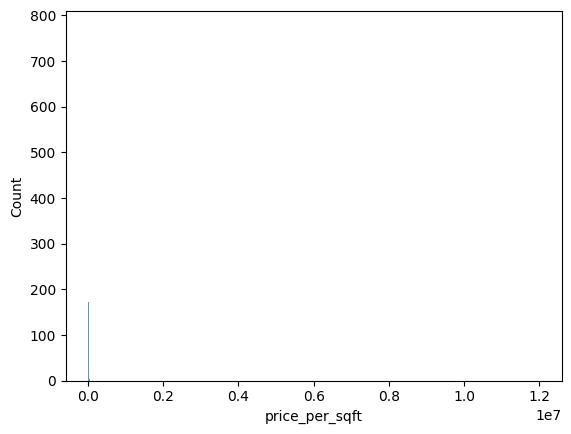

In [8]:
sns.histplot(df.price_per_sqft)

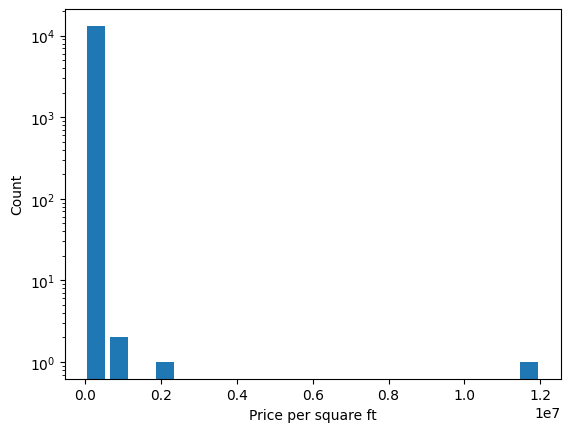

In [9]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [10]:


lower = df.price_per_sqft.mean() - (3*df.price_per_sqft.std())
lower

-312261.14424190175

In [11]:
upper = df.price_per_sqft.mean() + (3*df.price_per_sqft.std())
upper

328101.8177267502

In [12]:
df[df.price_per_sqft < lower]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [13]:
df[df.price_per_sqft >upper]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [14]:
from scipy import stats
df['zscore'] = stats.zscore(df.price_per_sqft)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391


In [15]:
df.zscore.describe()

count    1.320000e+04
mean     2.153160e-18
std      1.000038e+00
min     -7.171208e-02
25%     -3.423192e-02
50%     -2.325960e-02
75%     -5.653290e-03
max      1.123663e+02
Name: zscore, dtype: float64

In [16]:
df[df['zscore'] > 3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229266
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.782062
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.366280
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476881
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330231


In [17]:
df[df['zscore'] < -3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [18]:
df_no_outliers = df[(df['zscore'] > -3 ) & (df['zscore'] < 3 )]
df_no_outliers.shape

(13195, 8)

In [19]:
df.shape

(13200, 8)

In [20]:
df_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


In [21]:
df_no_outliers.price_per_sqft.std()

4876.727718320635

In [22]:


df_no_outliers.price_per_sqft.describe()

count     13195.000000
mean       6713.708602
std        4876.727718
min         267.000000
25%        4266.500000
50%        5434.000000
75%        7313.000000
max      200000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

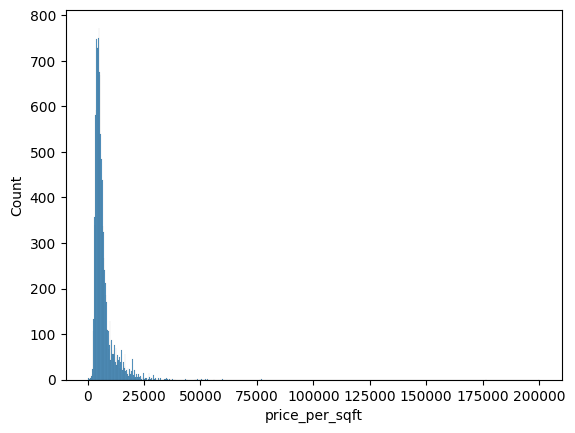

In [23]:
sns.histplot(df_no_outliers.price_per_sqft)

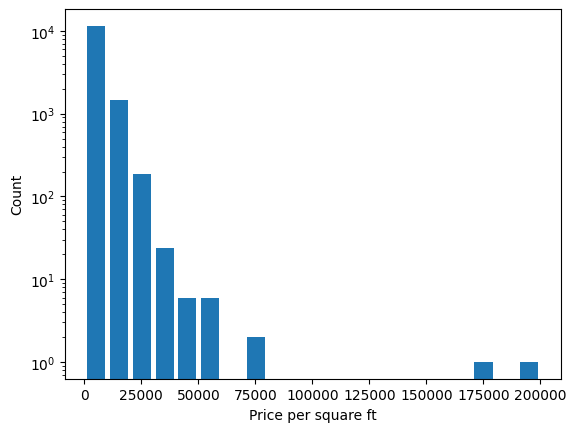

In [24]:
plt.hist(df_no_outliers.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [26]:
df_no_outliers.price_per_sqft.std()

4876.727718320635

to apply 4 std for df_no_outliers

In [27]:
# lower = mean - 4*std
# upper = mean + 4*std

In [28]:
df_no_outliers.price_per_sqft.mean()

6713.708601743085

In [29]:
df_no_outliers.price_per_sqft.std()

4876.727718320635

In [30]:
lower = df_no_outliers.price_per_sqft.mean() - (4*df_no_outliers.price_per_sqft.std())
lower

-12793.202271539456

In [31]:
upper = df_no_outliers.price_per_sqft.mean() + (4*df_no_outliers.price_per_sqft.std())
upper

26220.619475025625

In [34]:
df_no_outliers[df_no_outliers.price_per_sqft < lower]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [35]:
df_no_outliers[df_no_outliers.price_per_sqft > upper]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,0.265675
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,0.238118
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,0.222498
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666,0.175648
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,0.253738
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,0.338068


In [37]:
df_4_std = df_no_outliers[(df_no_outliers.price_per_sqft > lower) & (df_no_outliers.price_per_sqft < upper)]
df_4_std.shape

(13106, 8)

In [41]:
df.shape, df_no_outliers.shape, df_4_std.shape

((13200, 8), (13195, 8), (13106, 8))

In [44]:
df_4_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


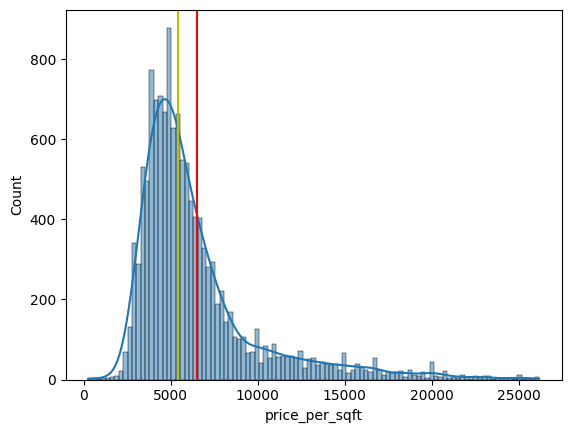

In [51]:
sns.histplot(df_4_std.price_per_sqft, kde = True)
plt.axvline(df_4_std.price_per_sqft.mean(), color = 'r')
plt.axvline(df_4_std.price_per_sqft.median(), color = 'y')


## Using Z-Score for removing the outliers in df_no_outliers

In [53]:
zscore = stats.zscore(df_no_outliers.price_per_sqft)
zscore

0       -0.618206
1       -0.430368
2       -0.493938
3       -0.096115
4       -0.505216
           ...   
13195   -0.005067
13196    0.901723
13197   -0.298512
13198    0.757359
13199   -0.743090
Name: price_per_sqft, Length: 13195, dtype: float64

In [62]:
df_no_outliers[(zscore < 4) & (zscore > -4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


In [61]:
df_no_outliers[zscore < -4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [63]:
df_no_outliers[zscore > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,0.265675
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,0.238118
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,0.222498
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666,0.175648
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,0.253738
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,0.179555
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,0.338068


By doing with the Z-Score with statestics module and upper & lower fence with (mean+/- 3*std) and (mean +/- 4*std) for Outliers removal,
by both of methods will give the same results.